In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import nltk

In [6]:
df = pd.read_csv('Reviews.csv')
print(df.shape)


(568454, 10)


In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


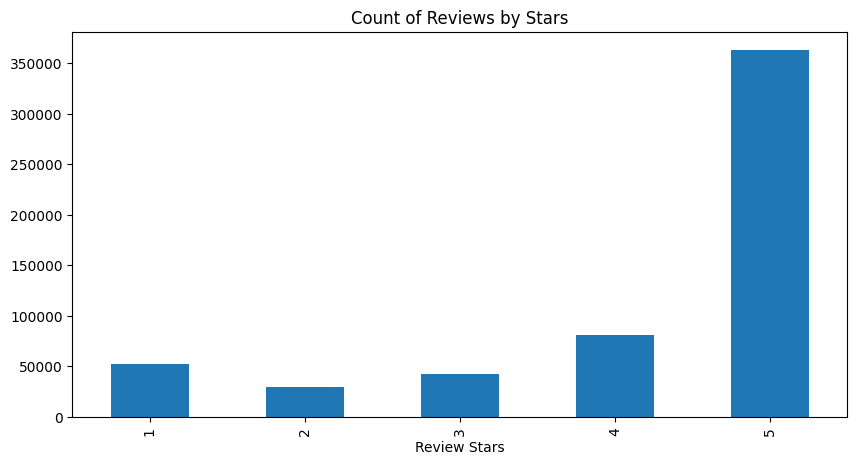

In [8]:
ax = df['Score'].value_counts().sort_index() .plot(kind='bar',title='Count of Reviews by Stars',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [9]:
example = df['Text'][0]
print(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [10]:
tokens = nltk.word_tokenize(example)
tokens

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 '.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 '.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most',
 '.']

In [11]:
tokens[:10]

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food']

In [12]:
tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [16]:
import pickle
filename = "model1.pkl"
pickle.dump(sia, open(filename, "wb"))

In [17]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json: 100%|██████████| 747/747 [00:00<?, ?B/s] 
c:\Users\Singla\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Singla\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
vocab.json:

In [18]:
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [33]:
encoded_text=tokenizer('I like thi product',return_tensors='pt')
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.4566,  0.4703,  2.4221]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [34]:
scores=output[0][0].detach().numpy()
scores_new=softmax(scores)
scores_new

array([0.00661698, 0.12353834, 0.8698447 ], dtype=float32)

In [35]:
scores_dict={
    'negative':scores_new[0],
    'neutral':scores_new[1],
    'positive':scores_new[2]
}

In [36]:
scores_dict

{'negative': 0.006616981, 'neutral': 0.12353834, 'positive': 0.8698447}

In [31]:
import pickle
filename = "model2.pkl"
pickle.dump(model, open(filename, "wb"))

In [32]:
import pickle
filename = "tokenizer.pkl"
pickle.dump(tokenizer, open(filename, "wb"))